## DBSCAN clustering vs KMean clustering

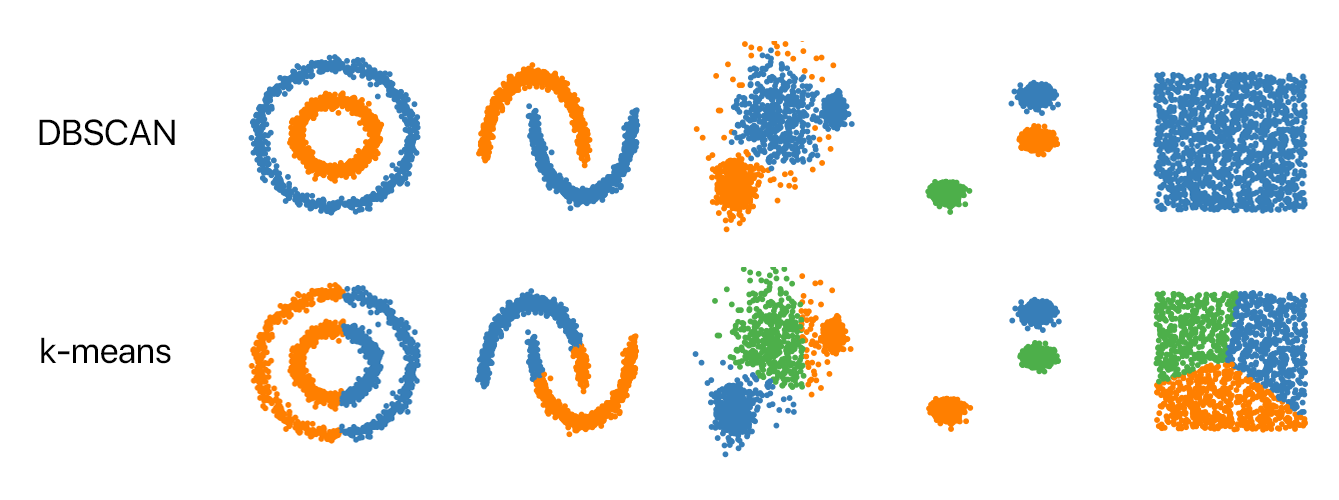

In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [2]:
# generate sample data

centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples = 750,centers=centers,cluster_std=0.4,random_state=0)

X.shape

(750, 2)

In [14]:
make_blobs(n_samples = 750,centers=centers,cluster_std=0.4,random_state=0)

(array([[ 0.84022039,  1.14802236],
        [-1.15474834, -1.2041171 ],
        [ 0.67863613,  0.72418009],
        ...,
        [ 0.26798858, -1.27833405],
        [-0.88628813, -0.30293249],
        [ 0.60046048, -1.29605472]], shape=(750, 2)),
 array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
        2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
        1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
        2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
        1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
        2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
        2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
        1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
        1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
        2, 2,

In [13]:
X

array([[-0.08080627,  0.80320669],
       [-0.56482633,  1.99941057],
       [-0.64960147, -2.13458179],
       ...,
       [-0.28093818, -0.41894402],
       [-0.66820592, -0.12481656],
       [ 0.07835953, -0.12664671]], shape=(750, 2))

In [3]:
labels_true

array([0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 1,
       1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 2,
       1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 2, 0, 2,
       2, 2, 0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 1, 2,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1,
       1, 2, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1,
       2, 2, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1,
       1, 0, 0, 1, 1, 0, 0, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0,

In [4]:
X = StandardScaler().fit_transform(X)

db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels=db.labels_

labels

array([ 0,  1,  0,  2,  0,  1,  1,  2,  0,  0,  1,  1,  1,  2,  1,  0, -1,
        1,  1,  2,  2,  2,  2,  2,  1,  1,  2,  0,  0,  2,  0,  1,  1,  0,
        1,  0,  2,  0,  0,  2,  2,  1,  1,  1,  1,  1,  0,  2,  0,  1,  2,
        2,  1,  1,  2,  2,  1,  0,  2,  1,  2,  2,  2,  2,  2,  0,  2,  2,
        0,  0,  0,  2,  0,  0,  2,  1, -1,  1,  0,  2,  1,  1,  0,  0,  0,
        0,  1,  2,  1,  2,  2,  0,  1,  0,  1, -1,  1,  1,  0,  0,  2,  1,
        2,  0,  2,  2,  2,  2, -1,  0, -1,  1,  1,  1,  1,  0,  0,  1,  0,
        1,  2,  1,  0,  0,  1,  2,  1,  0,  0,  2,  0,  2,  2,  2,  0, -1,
        2,  2,  0,  1,  0,  2,  0,  0,  2,  2, -1,  2,  1, -1,  2,  1,  1,
        2,  2,  2,  0,  1,  0,  1,  0,  1,  0,  2,  2, -1,  1,  2,  2,  1,
        0,  1,  2,  2,  2,  1,  1,  2,  2,  0,  1,  2,  0,  0,  2,  0,  0,
        1,  0,  1,  0,  1,  1,  2,  2,  0,  0,  1,  1,  2,  1,  2,  2,  2,
        2,  0,  2,  0,  2,  2,  0,  2,  2,  2,  0,  0,  1,  1,  1,  2,  2,
        2,  2,  1,  2,  2

In [5]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 
n_noise_ = list(labels).count(-1)

In [6]:
n_clusters_

3

In [7]:
n_noise_

18

In [8]:
print("estimated numbers of cluster: ",n_clusters_)
print("estimated numbers of noise points: ",n_noise_)
print("homogeneity: %0.3f" %metrics.homogeneity_score(labels_true,labels))

print("completeness: %0.3f" %metrics.completeness_score(labels_true,labels)) 

print("v-measure: %0.3f" %metrics.v_measure_score(labels_true,labels))

print("adjusted rand index: %0.3f" %metrics.adjusted_rand_score(labels_true,labels))

print("adjusted mutual information: %0.3f" %metrics.adjusted_mutual_info_score(labels_true,labels))

print("silhouette coefficient: %0.3f" %metrics.silhouette_score(X,labels))

estimated numbers of cluster:  3
estimated numbers of noise points:  18
homogeneity: 0.953
completeness: 0.883
v-measure: 0.917
adjusted rand index: 0.952
adjusted mutual information: 0.916
silhouette coefficient: 0.626


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

unique_labels = set(labels)
# unique_labels = np.unique(labels)

unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [10]:
colors = [plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
colors

[(np.float64(0.6196078431372549),
  np.float64(0.00392156862745098),
  np.float64(0.25882352941176473),
  np.float64(1.0)),
 (np.float64(0.9934640522875817),
  np.float64(0.7477124183006535),
  np.float64(0.4352941176470587),
  np.float64(1.0)),
 (np.float64(0.7477124183006538),
  np.float64(0.8980392156862746),
  np.float64(0.6274509803921569),
  np.float64(1.0)),
 (np.float64(0.3686274509803922),
  np.float64(0.30980392156862746),
  np.float64(0.6352941176470588),
  np.float64(1.0))]

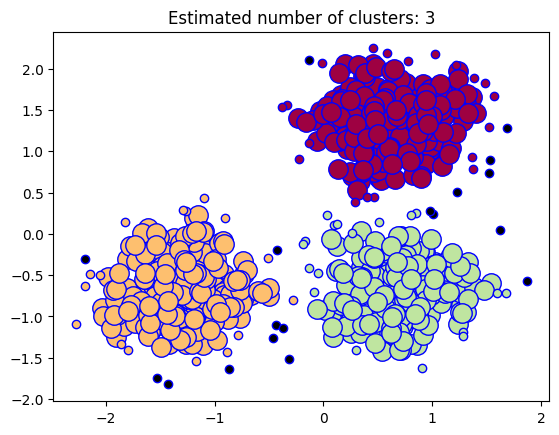

In [11]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor=tuple(col),markeredgecolor="blue",markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor=tuple(col),markeredgecolor="blue",markersize=6)

plt.title("Estimated number of clusters: %d"%n_clusters_)
plt.show()

#### DBSCAN to cluster circle data

estimated numbers of cluster: 2
homogeneity: 1.000
completeness: 0.913
v-measure: 0.917
adjusted rand index: 0.952
adjusted mutual information: 0.916
silhouette coefficient: -0.028


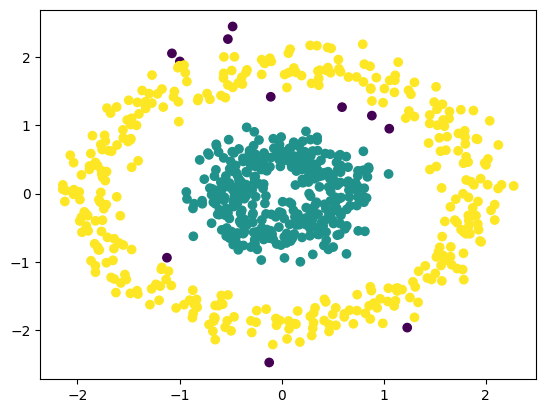

In [12]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler

X,y = make_circles(n_samples = 750,factor=0.3,noise=0.1,random_state=0)

X = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.3,min_samples = 10).fit_predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred)


print("estimated numbers of cluster: {}".format(len(set(y_pred[np.where(y_pred !=1)]))))

print("homogeneity: %0.3f" %metrics.homogeneity_score(y,y_pred))
print("completeness: %0.3f" %metrics.completeness_score(y,y_pred)) 
print("v-measure: %0.3f" %metrics.v_measure_score(labels_true,labels))
print("adjusted rand index: %0.3f" %metrics.adjusted_rand_score(labels_true,labels))
print("adjusted mutual information: %0.3f" %metrics.adjusted_mutual_info_score(labels_true,labels))
print("silhouette coefficient: %0.3f" %metrics.silhouette_score(X,labels))